In [80]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import cv2
import SimpleITK  as sitk

In [ ]:
x_list = []
y_list = []
circle = circle.copy()
for new_point in new_points:
    center_x = new_point[3]
    center_y = new_point[4]
    
    x_list.append(new_point[3])
    y_list.append(new_point[4])
x_list = np.array(x_list) 
y_list = np.array(y_list)
print(x_list)

x_max = x_list.max()
x_min = x_list.min()
y_max = y_list.max()
y_min = y_list.min()

print(x_max, x_min,y_max, y_min)

y_border= 1*y_diff
x_border = x_diff
x_min = int(x_min - x_border)
x_max = int(x_max +x_border)
# bbox = cv2.rectangle(circle, (x_min,y_min-y_border),(x_max,y_max+y_border),(0,255,0),10)
cropping = circle[y_min-y_border:y_max+y_border, x_min:x_max]
plt.imshow(cropping, cmap='gray')

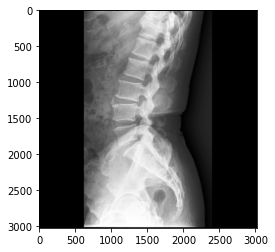

In [15]:
######image padding#######
out = np.zeros((h,h),dtype = np.float)
out[0:h,int(h/2-w/2):int(h/2+w/2)]=mask.copy().astype(np.float)
plt.imshow(out,'gray')

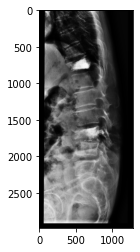

In [385]:
img_path = './img_dcm/2008_5439843_serimg00004.dcm'
image = sitk.ReadImage(img_path)
ori_image = sitk.GetArrayFromImage(image)[0]

plt.imshow(ori_image,'gray')

uint8
(3000, 1762)


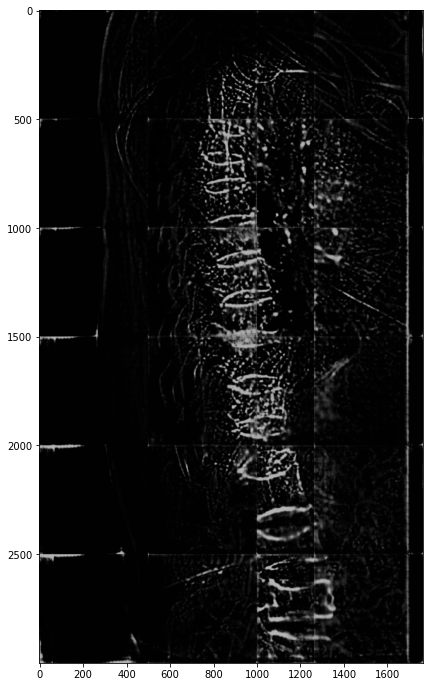

In [365]:
mask_path = './test_img/2009_5598406_ser001img00001_78.jpg'
mask  = cv2.imread(mask_path,0)
print(mask.dtype)
# mask = cv2.convertScaleAbs(mask)
mask = cv2.bitwise_not(mask)
# print(mask.dtype)
# mask = cv2.cvtColor(mask,cv2.COLOR_BGR2GRAY)
# mask = cv2.imread(mask_path,0)
# mask = cv2.equalizeHist(mask)
h=mask.shape[0]
w=mask.shape[1]
print(mask.shape)
plt.figure(figsize=(15,12))
plt.imshow(mask,'gray')
plt.show()

In [366]:
# print(pd.__version__)
arr = pd.read_csv('full_points.csv').to_numpy()
keys = np.array(arr[...,2])
keys_unique = np.unique(keys)
new_points=[]
for key_unique in keys_unique:
    vals= arr[np.where(arr[...,2]==key_unique)]
#     print(vals)


    for val in vals:
        if val[2]=='2009_5598406_ser001img00001.jpg':
#             print(val)
            new_points.append(val)
new_points = np.array(new_points)            
print(new_points)

[[1233 'points01392' '2009_5598406_ser001img00001.jpg' 1218 2946]
 [1234 'points01393' '2009_5598406_ser001img00001.jpg' 1214 2726]
 [1235 'points01394' '2009_5598406_ser001img00001.jpg' 1170 2470]
 [1236 'points01395' '2009_5598406_ser001img00001.jpg' 1078 2214]
 [1237 'points01396' '2009_5598406_ser001img00001.jpg' 1022 1990]
 [1238 'points01397' '2009_5598406_ser001img00001.jpg' 1006 1830]
 [1239 'points01398' '2009_5598406_ser001img00001.jpg' 974 1606]
 [1240 'points01399' '2009_5598406_ser001img00001.jpg' 942 1414]
 [1241 'points01400' '2009_5598406_ser001img00001.jpg' 930 1250]
 [1242 'points01401' '2009_5598406_ser001img00001.jpg' 886 1078]
 [1243 'points01402' '2009_5598406_ser001img00001.jpg' 854 914]
 [1244 'points01403' '2009_5598406_ser001img00001.jpg' 822 746]
 [1245 'points01404' '2009_5598406_ser001img00001.jpg' 838 634]
 [1246 'points01405' '2009_5598406_ser001img00001.jpg' 870 438]]


In [313]:
crop_img = []
for new_point in new_points:
    center_x = new_point[3]
    center_y = new_point[4]
#     rect = cv2.rectangle(mask, (center_x-200,center_y-150),(center_x+200,center_y+150),(255,255,255),-1)
    crop_img.append(ori_image[center_y-110:center_y+110, center_x-150:center_x+150])
# print(crop_img[8].dtype,crops[8].dtype)    
# add = crop_img[8]+crops[8]
# plt.imshow(add,'gray')

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
(10, 1, 2)


(<AxesSubplot:title={'center':'HoughFilter'}>,
 Text(0.5, 1.0, 'HoughFilter'))

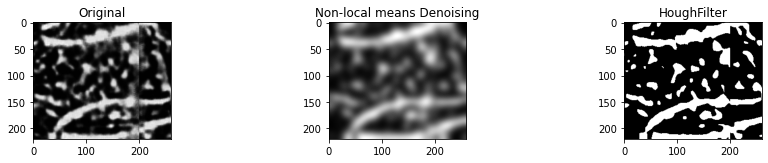

In [367]:
crops = []
for new_point in new_points:
    center_x = new_point[3]
    center_y = new_point[4]
#     rect = cv2.rectangle(mask, (center_x-200,center_y-150),(center_x+200,center_y+150),(255,255,255),-1)
    crops.append(mask[center_y-110:center_y+110, center_x-130:center_x+130])

    
plt.figure(figsize = (15,15))


plt.subplot(6,3,1),plt.imshow(crops[8],'gray'),plt.title('Original')
Gau = cv2.GaussianBlur(crops[8], (0,0),7)
fast = cv2.fastNlMeansDenoising(crops[8], None, 10,7,15)
# sobel =cv2.Sobel(Gau ,cv2.CV_8U,0,1,ksize=5)
# print(sobel.dtype)
canny1 = cv2.Canny(Gau ,0, 10,3)
canny2 = cv2.Canny(fast ,0, 10,3)
print(canny2)
# lines = cv2.HoughLinesP(canny1,1,np.pi/180,30,10,1)
# print(lines[1][0])
# print(lines[0][0][0],lines[0][0][1])
# points = []
# X=[]
# Y=[]
# for i in range(len(lines)):
# #     for j in range(len(lines[i][0])-1):
#     point = lines[i][0][0],lines[i][0][1]
#     point_2 = lines[i][0][2],lines[i][0][3]
    
#     X.append(lines[i][0][0])
#     Y.append(lines[i][0][1])
#     X.append(lines[i][0][2])
#     Y.append(lines[i][0][3])
# #     print(X)
# #     print(Y)
#     point = np.array(point)
#     points.append(point)
#     points.append(point_2)


# points = np.array(points)  
# print(points.shape[0])
#     point = [lines[0][0][0],lines[0][0][1]]
#     point = np.array(point)
#     print(point)
    
#     point = [lines[0]]


copy_image = crops[8].copy()
dst = cv2.cvtColor(copy_image, cv2.COLOR_GRAY2BGR)
# for x1,y1,x2,y2 in lines[0]:
#     lin = cv2.line(copy_image,(x1,y1),(x2,y2),(255,0,0),2)
# for i in range(lines.shape[0]):
#             pt1 = (lines[i][0][0], lines[i][0][1])
#             pt2 = (lines[i][0][2], lines[i][0][3])
#             cv2.line(dst, pt1, pt2, (0, 0, 255), 2, cv2.LINE_AA)

# sobel =cv2.Sobel(Gau ,cv2.CV_8U,0,1,ksize=5)
_,sobel_th1 = cv2.threshold(Gau,128, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
_,sobel_t17,17),np.uint8)h2 = cv2.threshold(fast,128, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
kernel = np.ones((
result = cv2.morphologyEx(sobel_th1,cv2.MORPH_CLOSE,kernel)
# result = v
contours ,_= cv2.findContours(sobel_th1,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
print(contours[0].shape)

# cnt = contours[0]
# print(cnt)
# epsilon1 = 0.01*cv2.arcLength(cnt, True)
# approx1 = cv2.approxPolyDP(cnt, 50, False)
mask = np.zeros_like(result)
cv2.drawContours(mask,contours,1,255,-1) 
out = np.zeros_like(result)
out[mask == 255] = result[mask == 255]

(y, x) = np.where(mask == 0) ##픽셀이 0인 부분 좌표
# print(y,x)
# print(out.shape)
rows,cols = out.shape[:2]
mask = np.zeros((rows+2,cols+2),np.uint8)
retval = cv2.floodFill(out,mask, (170,200),(255,255,255)) 

retval2 = cv2.morphologyEx(out,cv2.MORPH_CLOSE,(17,17))

plt.subplot(6,3,2),plt.imshow(Gau  ,cmap='gray'),plt.title('Non-local means Denoising')

plt.subplot(6,3,3),plt.imshow(sobel_th2,'gray'),plt.title('HoughFilter')

uint8


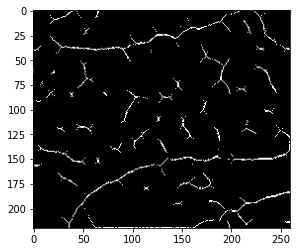

In [384]:
plt.imshow(sobel_th2,'gray')
print(sobel_th2.dtype)
skel = skeletonize(sobel_th2)
plt.imshow(skel,'gray')

In [196]:
######skeletonize#######
import cv2
def skeletonize(img):
    """ OpenCV function to return a skeletonized version of img, a Mat object"""

    #  hat tip to http://felix.abecassis.me/2011/09/opencv-morphological-skeleton/

    img = img.copy() # don't clobber original
    skel = img.copy()

    skel[:,:] = 0
    kernel = cv2.getStructuringElement(cv2.MORPH_CROSS, (3,3))

    while True:
        eroded = cv2.morphologyEx(img, cv2.MORPH_ERODE, kernel)
        temp = cv2.morphologyEx(eroded, cv2.MORPH_DILATE, kernel)
        temp  = cv2.subtract(img, temp)
        skel = cv2.bitwise_or(skel, temp)
        img[:,:] = eroded[:,:]
        if cv2.countNonZero(img) == 0:
            break

    return skel

1
[[187   0]] [[502 278]]
3325.5
0
1


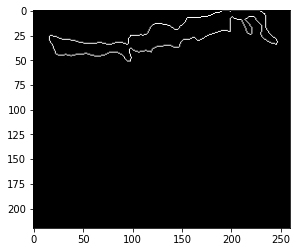

In [383]:
######contour######
contours ,_= cv2.findContours(sobel_th2,cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE)

# print(len(contours))
# plt.imshow(Gau)

pointlist = []
pointlist2 = []
for points in contours:
    pointlist.append(cv2.contourArea(points))
    pointlist2.append(cv2.contourArea(points))


print(sorted(pointlist2)[-2])

mask = np.zeros_like(sobel_th2)
mask = cv2.drawContours(mask,contours[pointlist.index(max(pointlist))],-1,1,-1) 

# y_idx, x_idx = np.where(mask==1)
# print(y_idx,x_idx)
# x=x_idx.min()
# y=y_idx.min()

# print(x,y)
# mask = cv2.fillPoly(mask,contours[pointlist.index(max(pointlist))],1)
# mask = cv2.drawContours(mask,contours[pointlist.index(sorted(pointlist2)[-2])],-1,1,-1) 
print(mask.max())
plt.imshow(mask,'gray')

In [335]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# skeletonize 
size = np.size(mask)  # get number of pixels
skel = np.zeros(mask.shape, np.uint8) # create an array of zeros with the same shape as the image and 256 gray levels

element = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3)) # create a structurant element (cross)
done = False

while(not done):
    eroded = cv2.erode(mask, element)
    temp = cv2.dilate(eroded, element)
    temp = cv2.subtract(mask, temp)
    skel = cv2.bitwise_or(skel, temp)
    img = eroded.copy()
    zeros = size - cv2.countNonZero(img)
    if zeros == size:
        done = True

plt.imshow(skel,'gray')
# cs = plt.contour(skel, 1)
# p = cs.collections[0].get_paths()[0]
# v = p.vertices
# x = v[:, 0]
# y = v[:, 1]


KeyboardInterrupt: 

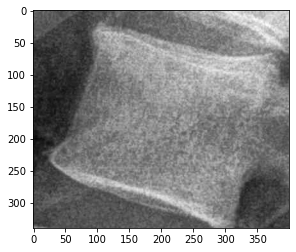

In [814]:
plt.imshow(crops[3],'gray')

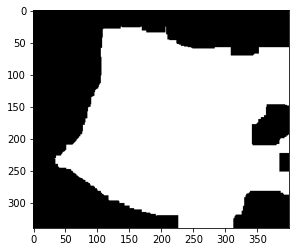

In [756]:
v[210:248,52:90]=255
plt.imshow(v,'gray')

uint8 uint8


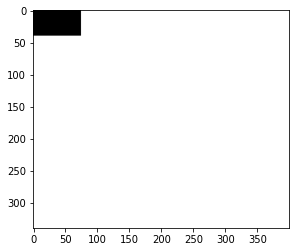

In [538]:
mask = np.zeros((340,400),dtype = 'uint8')
mask[0:40,0:75]=1
mask = 1-mask
print(mask.dtype,result.dtype)
plt.imshow(mask,'gray')

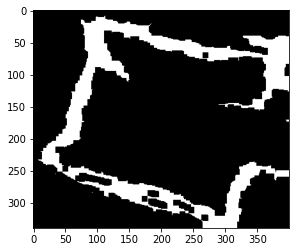

In [540]:
bitwise2 = cv2.bitwise_and(bitwise,mask)
bitwise2[250:260,380:400]=1
plt.imshow(bitwise2,'gray')

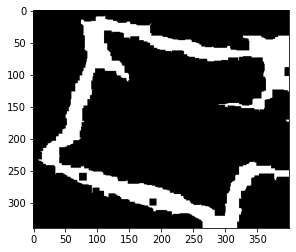

In [543]:
#########final 20140214_7814348_ser001img00002의 끝에서 두번째 척추##########
kernel = np.ones((11,11),np.uint8)
rere= cv2.morphologyEx(bitwise2,cv2.MORPH_CLOSE,kernel)
# plt.imshow(crops[2],'gray')
# plt.imshow(rere,alpha=0.4,cmap= 'Reds')
plt.imshow(rere,'gray')

1 255


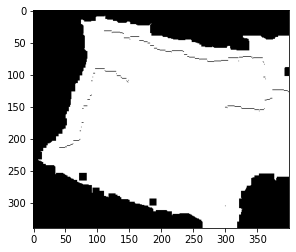

In [598]:
re = rere*255
o = cv2.bitwise_or(re,retval2)

print(rere.max(),retval2.max())
plt.imshow(o,'gray')

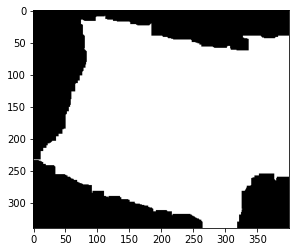

In [602]:
kernel = np.ones((17,17),np.uint8)
o= cv2.morphologyEx(o,cv2.MORPH_CLOSE,kernel)
plt.imshow(crops[3],'gray')
plt.imshow(o,alpha =0.4,cmap='Reds')
plt.imshow(o,'gray')
plt.show()